<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import sys
sys.path.insert(0, os.path.relpath('../../../../..')) 



In [2]:

from recidiviz.calculator.modeling.population_projection.super_simulation.super_simulation_factory import SuperSimulationFactory
from recidiviz.calculator.modeling.population_projection.transition_table import TransitionTable
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy
from recidiviz.calculator.modeling.population_projection.shell_compartment import ShellCompartment
import pandas as pd
import numpy as np
from functools import partial
import yaml
%config Completer.use_jedi = False

/Users/pacopoler/.local/share/virtualenvs/pulse-data-Jd9N3JcA/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1852: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


outflows_data returned 240 results
transitions_data returned 65 results
total_population_data returned 126 results
initialization time:  4.156994819641113
simulation_time:  9.175590991973877
initialization time:  4.489810943603516
simulation_time:  7.052015066146851
initialization time:  3.665006160736084
simulation_time:  6.4664530754089355


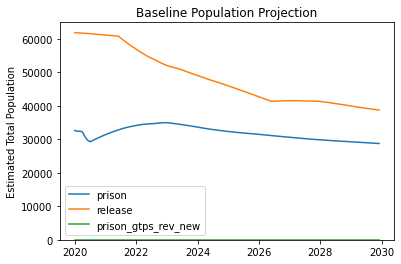

In [3]:
path_from_state_folder = 'LA/HB_479/LA_HB479_model_inputs.yaml'
display_compartments = ['prison', 'release', 'prison_gtps_rev_new']
test_sim = SuperSimulationFactory.build_super_simulation('../state/' + path_from_state_folder)
test_sim.simulate_baseline(display_compartments)

initialization time:  3.8147149085998535
initialization time:  3.580145835876465
simulation_time:  6.361394882202148
simulation_time:  6.400055170059204


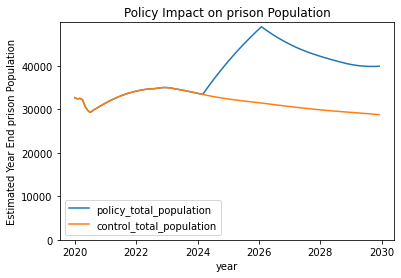

In [4]:
pd.set_option('display.max_rows', 500)
AVG_gtps_sentence = 64.08

new_transitions_data = pd.DataFrame({
    'compartment': ['prison'] * 2,
    'outflow_to': ['release'] * 2,
    'age': ['x'] * 2,
    'total_population': [8.3, 100 - 8.3],
    'compartment_duration': [69, 0.85 * AVG_gtps_sentence]
})


# Policy Option Methods



def abolish_parole(retroactive=False):
    return partial(TransitionTable.use_alternate_transitions_data,
                   alternate_historical_transitions = new_transitions_data,
                   retroactive=retroactive,
                  )

policy_list_non_retroactive = [
    SparkPolicy(policy_fn=abolish_parole(),
                spark_compartment='prison',
                sub_population={'age': 'x'},
                policy_ts=13)
]
    
test_results = test_sim.simulate_policy(policy_list_non_retroactive, 'prison')

In [5]:
simulation_tag = 'LA_HB_479'
test_sim.upload_policy_simulation_results_to_bq(simulation_tag)

{'spending_diff':                         prison release release_full prison_gtps_rev_new
 year                                                                   
 2020.000000                0.0     0.0          0.0                 0.0
 2020.083333                0.0     0.0          0.0                 0.0
 2020.166667                0.0     0.0          0.0                 0.0
 2020.250000                0.0     0.0          0.0                 0.0
 2020.333333                0.0     0.0          0.0                 0.0
 2020.416667                0.0     0.0          0.0                 0.0
 2020.500000                0.0     0.0          0.0                 0.0
 2020.583333                0.0     0.0          0.0                 0.0
 2020.666667                0.0     0.0          0.0                 0.0
 2020.750000                0.0     0.0          0.0                 0.0
 2020.833333                0.0     0.0          0.0                 0.0
 2020.916667                0.0   